**Deep Learning Examples**

Lecturer: Ashish Mahabal

Jupyter Notebook Author: Kaushal Sharma, modified by Ashish Mahabal.

This is a Jupyter notebook lesson extending the deep learning workshop at the Astronomical Society of India, Annual meeting, 2018 and adapted for the NARIT-EACOA 2019 summer workshop.

**Objective**

Introduce the user to deep learning using Python.

**Key steps**
* Run a model for few epochs

**Required dependencies**

Nominally, you should be able to install the python modules with pip install <module>. The external astromatic packages are easiest installed using package managers (e.g., rpm, apt-get).

Python modules
python 3
* tensorflow
* numpy
* matplotlib
* scikit-learn

External packages

None

**Exercise 1: Using Neural network for more rigorous training**

Train the neural network on different colors for classifying to check if other colors can help.# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
datapath = '/content/drive/My Drive/Work/Teaching/UCR202002/data/'
sys.path.insert(1, datapath)

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [5]:
# Read the files and prepare training and test matrices
color_data = pd.read_csv(datapath + "train_colors.csv")

# Calculate dereddended colors
u_g = color_data['dered_u'] - color_data['dered_g']
g_r = color_data['dered_g'] - color_data['dered_r']
r_i = color_data['dered_r'] - color_data['dered_i']
i_z = color_data['dered_i'] - color_data['dered_z']

# Combine the columns generated with the original data frame
color_data['u_g'] = u_g.values
color_data['g_r'] = g_r.values
color_data['r_i'] = r_i.values
color_data['i_z'] = i_z.values

train_in_colors = np.column_stack((u_g.values, g_r.values, r_i.values, i_z.values))
train_out_colors = np.array(color_data['spiral'])

# Testing data
color_test_data = pd.read_csv(datapath + "test_colors.csv")

# Calculate dereddended colors
tu_g = color_test_data['dered_u'] - color_test_data['dered_g']
tg_r = color_test_data['dered_g'] - color_test_data['dered_r']
tr_i = color_test_data['dered_r'] - color_test_data['dered_i']
ti_z = color_test_data['dered_i'] - color_test_data['dered_z']

# Prepare test matrix and expected output
test_in_colors = np.column_stack((tu_g.values, tg_r.values, tr_i.values, ti_z.values))
test_out_colors = np.array(color_test_data['spiral'])

print("Size of the training matrix: ", np.shape(train_in_colors), np.shape(train_out_colors))
print("Size of the test matrix:     ", np.shape(test_in_colors), np.shape(test_out_colors))

Size of the training matrix:  (3000, 4) (3000,)
Size of the test matrix:      (1000, 4) (1000,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import plot_model
import pydot

In [8]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Design a neural network
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model, to_file=datapath + 'model.png', show_shapes=True, show_layer_names=True)

# Fit the model
model_info = model.fit(train_in_colors, train_out_colors, epochs=150, batch_size=10, validation_split=0.3, 
                       shuffle=True, verbose=2)
# evaluate the model
scores = model.evaluate(train_in_colors, train_out_colors)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Train on 2100 samples, validate on 900 samples
Epoch 1/150
2100/2100 - 2s - loss: 0.7045 - acc: 0.4867 - val_loss: 0.6975 - val_acc: 0.4389
Epoch 2/150
2100/2100 - 1s - loss: 0.6921 - acc: 0.5248 - val_loss: 0.6983 - val_acc: 0.4389
Epoch 3/150
2100/2100 - 1s - loss: 0.6918 - acc: 0.5252 - val_loss: 0.6989 - val_acc: 0.4389
Epoch 4/150
2100/2100 - 1s - loss: 0.6915 - acc: 0.5257 - val_

In [9]:
# Test the trained model
test_pred_colors = model.predict(test_in_colors)

# Prediction are in probabilities. Round them to convert into binary sequence
test_pred_colors = np.around(test_pred_colors)

# Print accuracy score
accuracy_score(test_out_colors, test_pred_colors)

0.871

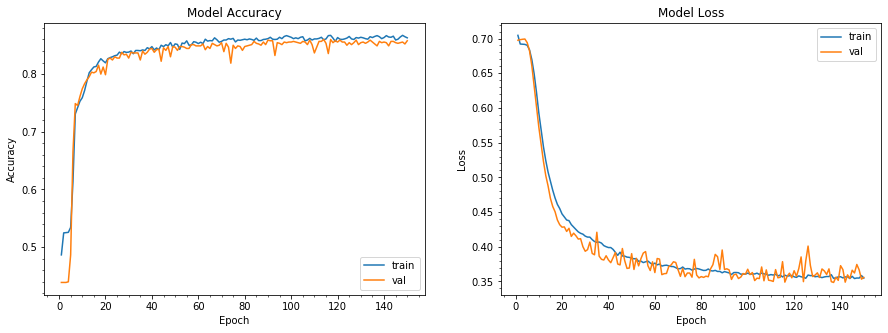

In [15]:
# Plot Accuracy and/or Loss as a Function of Number of Epoch

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history[acckey])+1),model_history.history[acckey])
    axs[0].plot(range(1,len(model_history.history[valacckey])+1),model_history.history[valacckey])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axs[0].get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axs[0].legend(['train', 'val'], loc='best')
    # axs[0].tick_params(top=True, right=True, labeltop=True, labelright=True, which='both')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axs[1].get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [11]:
model_info.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
acckey = 'accuracy'
valacckey = 'val_accuracy'
acckey = 'acc'
valacckey = 'val_acc'

In [16]:
# Use 10-fold cross validation for shuffling the validation sample
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(train_in_colors, train_out_colors):
  # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(train_in_colors[train], train_out_colors[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(train_in_colors[test], train_out_colors[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 83.27%
acc: 84.67%
83.97% (+/- 0.70%)


In [17]:
# Test the trained model
test_pred_colors = model.predict(test_in_colors)

# Prediction are in probabilities. Round them to convert into binary sequence
test_pred_colors = np.around(test_pred_colors)

# Print accuracy score
accuracy_score(test_out_colors, test_pred_colors)

0.854

# Exercise 2: Using Convolutional Neural network on images of galaxies for Ellipticals Spirals classification

In [0]:
# We are using keras framework with tensorflow as the backend
# Convolutional Neural Networks are multi-layer neural networks that assume the input data to be images.

# Sequential is simply a linear stack of neural network layers, and it's perfect for the type of 
# feed-forward CNN
from tensorflow.keras.models import Sequential

# Import the core layers from Keras which are used in almost any neural network
from tensorflow.keras.layers import Dense, Flatten

# Import CNN layers from Keras that will help us efficiently train on image data
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Helps to preprocess the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Create your model
model = Sequential()

# Add first convolutional layer. A full-color image with all 3 RGB channels will have a depth of 3.
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Define the maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

# Layer which Flatten the data
model.add(Flatten())

# Add more layers to the network
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# We need to compile the model. Declare the loss function and the optimizer (SGD, Adam, etc.).
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Preprocess the images
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Define the training and test set
training_set = train_datagen.flow_from_directory(datapath + 'Training', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory(datapath + 'Testing',target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 1470 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [0]:
# Train your model
model.fit_generator(training_set, steps_per_epoch = 400, epochs = 2, validation_data = test_set, validation_steps = 2000)

Epoch 1/2
 27/400 [=>............................] - ETA: 2:09:19 - loss: 0.6079 - acc: 0.7245